In [5]:
import pandas as pd
import data_cleaner as clean

In [6]:
who_1 = pd.read_csv("../data/WHO-CHILD-HEALTH-1.csv")
who_2 = pd.read_csv("../data/WHO-CHILD-HEALTH-2a.csv")
who_3 = pd.read_csv("../data/WHO-CHILD-HEALTH-3.csv")
who_4 = pd.read_csv("../data/WHO-CHILD-HEALTH-4.csv")
imr = pd.read_csv("../data/WHO-IMR-2017-2019.csv")

In [7]:
who_1.head()

,GHO,PUBLISHSTATE,YEAR,REGION,WORLDBANKINCOMEGROUP,COUNTRY,Display Value,Numeric,Low,High,Comments
0,PCV3,PUBLISHED,2015,EMR,WB_LI,AFG,65,65.0,NaN,NaN,NaN
1,WHS4_100,PUBLISHED,1992,EMR,WB_LI,AFG,21,21.0,NaN,NaN,NaN
2,WHS4_100,PUBLISHED,1995,EMR,WB_LI,AFG,20,20.0,NaN,NaN,NaN
3,WHS4_100,PUBLISHED,2012,EMR,WB_LI,AFG,67,67.0,NaN,NaN,NaN
4,WHS4_543,PUBLISHED,1982,EMR,WB_LI,AFG,10,10.0,NaN,NaN,NaN


In [8]:
# Filter and restructure the dataset to make it easier to work with

year_filter = who_1['YEAR'] == 2018
who_1 = who_1[year_filter]

who_subset = who_1[['GHO', 'YEAR', 'COUNTRY', 'Numeric']]

countries = sorted(list(set(who_subset['COUNTRY'])))
codes = sorted(list(set(who_subset['GHO'])))
index = pd.Index(countries, name='COUNTRY')

new_df = pd.DataFrame(index=index, columns=codes)

In [9]:
new_df.head()

,PCV3,ROTAC,WHS4_100,WHS4_117,WHS4_129,WHS4_543,WHS4_544,WHS8_110
COUNTRY,,,,,,,,
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
code = codes[0]
print("Code:", code)
filter = who_subset['GHO'] == code
who_subset[filter].head()

Code: PCV3


,GHO,YEAR,COUNTRY,Numeric
100,PCV3,2018,BGD,97.0
368,PCV3,2018,ESP,93.0
474,PCV3,2018,BDI,90.0
592,PCV3,2018,CHE,84.0
598,PCV3,2018,CHL,93.0


In [11]:
country = countries[0]
print("Country:", country)
filter = who_subset['COUNTRY'] == country
test = who_subset[filter].head()
test.index = test['GHO']
test[['GHO', 'Numeric']].T

Country: AFG


GHO,WHS8_110,PCV3,WHS4_100,WHS4_544,WHS4_129
GHO,WHS8_110,PCV3,WHS4_100,WHS4_544,WHS4_129
Numeric,64,65,66,73,66


In [16]:
who_2['SEX'].value_counts()

FMLE    1690
MLE     1690
Name: SEX, dtype: int64

In [13]:
who_3.head()

,GHO,DATASOURCE,PUBLISHSTATE,YEAR,REGION,WORLDBANKINCOMEGROUP,COUNTRY,EDUCATIONLEVEL,SEX,RESIDENCEAREATYPE,WEALTHQUINTILE,Display Value,Numeric,Low,High,Comments
0,pncall5,EQ_DHS,PUBLISHED,2008,EUR,NaN,ALB,NaN,MLE,NaN,NaN,98.5,98.46,NaN,NaN,NaN
1,pncall3,EQ_DHS,PUBLISHED,2010,EUR,NaN,ARM,NaN,FMLE,NaN,NaN,100.0,100.00,NaN,NaN,NaN
2,pncall5,EQ_DHS,PUBLISHED,2010,EUR,NaN,ARM,NaN,FMLE,NaN,NaN,99.8,99.79,NaN,NaN,NaN
3,pncall3,EQ_DHS,PUBLISHED,2007,SEAR,NaN,BGD,NaN,FMLE,NaN,NaN,23.1,23.10,NaN,NaN,NaN
4,pncall5,EQ_DHS,PUBLISHED,2007,SEAR,NaN,BGD,NaN,FMLE,NaN,NaN,21.0,21.05,NaN,NaN,NaN


In [14]:
who_3['SEX'].value_counts()

BTSX    809
MLE     642
FMLE    639
Name: SEX, dtype: int64

In [6]:
who_4.head()

,GHO,PUBLISHSTATE,YEAR,REGION,WORLDBANKINCOMEGROUP,COUNTRY,SEX,Display Value,Numeric,Low,High,Comments
0,WHOSIS_000005,PUBLISHED,2008,AMR,WB_LMI,BLZ,NaN,14,NaN,NaN,NaN,NaN
1,WHOSIS_000005,PUBLISHED,2006,AFR,WB_LI,BEN,NaN,15,NaN,NaN,NaN,NaN
2,WHOSIS_000005,PUBLISHED,2008,SEAR,WB_LMI,BTN,NaN,9,NaN,NaN,NaN,NaN
3,WHOSIS_000005,PUBLISHED,2008,AMR,WB_LMI,BOL,NaN,6,NaN,NaN,NaN,NaN
4,WHOSIS_000005,PUBLISHED,2008,WPR,WB_LMI,CHN,NaN,3,NaN,NaN,NaN,NaN


In [15]:
who_4['SEX'].value_counts()

BTSX    3696
Name: SEX, dtype: int64

In [10]:
for col in who_4.columns:
    print(col)
    print(who_4[col].value_counts())
    print()

GHO
LBW_NUMBER        2336
LBW_PREVALENCE    2336
NUTRITION_WH2      924
NUTRITION_WA_2     924
NUTRITION_WH_2     924
NUTRITION_HA_2     924
WHOSIS_000006      530
WHOSIS_000005      215
Name: GHO, dtype: int64

PUBLISHSTATE
PUBLISHED    9113
Name: PUBLISHSTATE, dtype: int64

YEAR
2000         569
2006         526
2014         463
2012         445
2005         440
            ... 
2014-2017      4
2009-2011      4
1986-1988      4
1985-1986      4
2007-2010      4
Name: YEAR, Length: 85, dtype: int64

REGION
AFR     2628
EUR     2124
AMR     1852
WPR      972
EMR      791
SEAR     722
Name: REGION, dtype: int64

WORLDBANKINCOMEGROUP
WB_LMI    50
WB_UMI    40
WB_LI     40
WB_HI     29
Name: WORLDBANKINCOMEGROUP, dtype: int64

COUNTRY
BGD    137
VNM    128
VEN    118
JAM    115
PER    107
      ... 
GRD      1
CYP      1
NIU      1
PLW      1
FSM      1
Name: COUNTRY, Length: 195, dtype: int64

SEX
BTSX    3696
Name: SEX, dtype: int64

Display Value
0.0 [0.0-0.0]       48
1.6           

In [7]:
imr.head()

,GHO,PUBLISHSTATE,YEAR,REGION,UNREGION,WORLDBANKINCOMEGROUP,COUNTRY,SEX,Display Value,Numeric,Low,High,Comments
0,MDG_0000000001,PUBLISHED,2018,EMR,NaN,NaN,AFG,BTSX,48.0,48.04333,39.94430,56.32006,NaN
1,MDG_0000000001,PUBLISHED,2018,EMR,NaN,NaN,AFG,FMLE,44.6,44.55944,36.87615,52.43261,NaN
2,MDG_0000000001,PUBLISHED,2018,EMR,NaN,NaN,AFG,MLE,51.3,51.34710,42.55961,60.39946,NaN
3,MDG_0000000001,PUBLISHED,2018,AFR,NaN,NaN,AGO,BTSX,51.9,51.87144,28.20570,87.37608,NaN
4,MDG_0000000001,PUBLISHED,2018,AFR,NaN,NaN,AGO,FMLE,46.3,46.32707,25.06762,78.38194,NaN


In [23]:
who_1['Country_Year'] = who_1['COUNTRY'].str.cat(who_1['YEAR'].astype(str),sep="_")

In [40]:
who_1.head()

,GHO,PUBLISHSTATE,YEAR,REGION,WORLDBANKINCOMEGROUP,COUNTRY,Display Value,Numeric,Low,High,Comments
Country_Year,,,,,,,,,,,
ALB_2018,WHS4_544,PUBLISHED,2018,EUR,WB_UMI,ALB,99,99.0,NaN,NaN,NaN
AUS_2018,ROTAC,PUBLISHED,2018,WPR,WB_HI,AUS,87,87.0,NaN,NaN,NaN
AUS_2018,WHS4_129,PUBLISHED,2018,WPR,WB_HI,AUS,94,94.0,NaN,NaN,NaN
AUT_2018,WHS4_129,PUBLISHED,2018,EUR,WB_HI,AUT,85,85.0,NaN,NaN,NaN
BFA_2018,WHS4_543,PUBLISHED,2018,AFR,WB_LI,BFA,98,98.0,NaN,NaN,NaN


In [26]:
who_1 = who_1.set_index('Country_Year')

In [44]:
who_subset[who_subset['COUNTRY'] == 'AUS']

,GHO,Display Value,COUNTRY,YEAR
Country_Year,,,,
AUS_2018,ROTAC,87,AUS,2018
AUS_2018,WHS4_129,94,AUS,2018
AUS_2018,WHS4_117,95,AUS,2018
AUS_2018,WHS4_100,95,AUS,2018
AUS_2018,WHS4_544,95,AUS,2018
AUS_2018,WHS8_110,95,AUS,2018
AUS_2018,PCV3,95,AUS,2018


In [45]:
who_subset[who_subset['GHO'] == 'ROTAC']

,GHO,Display Value,COUNTRY,YEAR
Country_Year,,,,
AUS_2018,ROTAC,87,AUS,2018
BRA_2018,ROTAC,80,BRA,2018
BHR_2018,ROTAC,98,BHR,2018
ERI_2018,ROTAC,96,ERI,2018
FSM_2018,ROTAC,52,FSM,2018
...,...,...,...,...
KEN_2018,ROTAC,92,KEN,2018
KWT_2018,ROTAC,69,KWT,2018
LVA_2018,ROTAC,79,LVA,2018


In [48]:
test_df = pd.DataFrame(index = who_subset.index)

In [43]:
who_subset.head()

,GHO,Display Value,COUNTRY,YEAR
Country_Year,,,,
ALB_2018,WHS4_544,99,ALB,2018
AUS_2018,ROTAC,87,AUS,2018
AUS_2018,WHS4_129,94,AUS,2018
AUT_2018,WHS4_129,85,AUT,2018
BFA_2018,WHS4_543,98,BFA,2018


In [38]:
who_subset_usa = who_subset[who_subset['COUNTRY'] == 'USA']

In [39]:
who_subset_usa.T.head()

Country_Year,USA_2018,USA_2018,USA_2018,USA_2018,USA_2018,USA_2018,USA_2018
GHO,WHS8_110,WHS4_544,WHS4_117,ROTAC,WHS4_129,WHS4_100,PCV3
Display Value,92,93,91,73,92,94,92
COUNTRY,USA,USA,USA,USA,USA,USA,USA


In [29]:
who_1.head()

,GHO,PUBLISHSTATE,YEAR,REGION,WORLDBANKINCOMEGROUP,COUNTRY,Display Value,Numeric,Low,High,Comments
Country_Year,,,,,,,,,,,
ALB_2018,WHS4_544,PUBLISHED,2018,EUR,WB_UMI,ALB,99,99.0,NaN,NaN,NaN
AUS_2018,ROTAC,PUBLISHED,2018,WPR,WB_HI,AUS,87,87.0,NaN,NaN,NaN
AUS_2018,WHS4_129,PUBLISHED,2018,WPR,WB_HI,AUS,94,94.0,NaN,NaN,NaN
AUT_2018,WHS4_129,PUBLISHED,2018,EUR,WB_HI,AUT,85,85.0,NaN,NaN,NaN
BFA_2018,WHS4_543,PUBLISHED,2018,AFR,WB_LI,BFA,98,98.0,NaN,NaN,NaN


In [47]:
who1b

,PCV3,ROTAC,WHS4_100,WHS4_117,WHS4_129,WHS4_543,WHS4_544,WHS8_110
COUNTRY,,,,,,,,
AFG,65,45,66,66,66,78,73,64
AGO,59,48,63,59,59,72,56,50
ALB,98,NaN,99,99,99,99,99,94
AND,94,NaN,99,98,99,NaN,99,99
ARE,99,99,99,99,99,95,99,99
...,...,...,...,...,...,...,...,...
WSM,NaN,NaN,34,34,34,62,31,31
YEM,64,64,65,65,65,64,59,64
ZAF,73,70,74,74,74,70,74,70


In [2]:
#cleanWHO.py
import pandas as pd


who1 = pd.read_csv("../data/WHO-CHILD-HEALTH-1.csv")
pd.set_option('display.max_columns', None)


filter = who1["YEAR"] == 2018
who1 = who1[filter]
who_subset = who1[['GHO','YEAR','COUNTRY', 'Numeric']]
countries = sorted(list(set(who_subset['COUNTRY'])))
codes = sorted(list(set(who_subset['GHO'])))
index = pd.Index(countries, name='COUNTRY')

who1b = pd.DataFrame(index=index, columns=codes)

for i in countries:
    for j in codes:
        country = i
        code = j
        filter = who_subset['COUNTRY'] == country
        temp = who_subset[filter]
        factors = temp['GHO'].tolist()
        temp.index = factors
        if j not in factors:
            continue
        else:
            who1b.at[country,code] = temp.at[code, 'Numeric']

print(who1b)

        PCV3 ROTAC WHS4_100 WHS4_117 WHS4_129 WHS4_543 WHS4_544 WHS8_110
COUNTRY                                                                 
AFG       65    45       66       66       66       78       73       64
AGO       59    48       63       59       59       72       56       50
ALB       98   NaN       99       99       99       99       99       94
AND       94   NaN       99       98       99      NaN       99       99
ARE       99    99       99       99       99       95       99       99
...      ...   ...      ...      ...      ...      ...      ...      ...
WSM      NaN   NaN       34       34       34       62       31       31
YEM       64    64       65       65       65       64       59       64
ZAF       73    70       74       74       74       70       74       70
ZMB       90    91       90       90       90       91       90       94
ZWE       89    90       89       89       89       95       89       88

[194 rows x 8 columns]


In [3]:
who1b

,PCV3,ROTAC,WHS4_100,WHS4_117,WHS4_129,WHS4_543,WHS4_544,WHS8_110
COUNTRY,,,,,,,,
AFG,65,45,66,66,66,78,73,64
AGO,59,48,63,59,59,72,56,50
ALB,98,NaN,99,99,99,99,99,94
AND,94,NaN,99,98,99,NaN,99,99
ARE,99,99,99,99,99,95,99,99
...,...,...,...,...,...,...,...,...
WSM,NaN,NaN,34,34,34,62,31,31
YEM,64,64,65,65,65,64,59,64
ZAF,73,70,74,74,74,70,74,70


In [51]:
##START HERE:

In [62]:
who_1 = pd.read_csv("../data/WHO-CHILD-HEALTH-1.csv")

In [63]:
who_1['Country_Year'] = who_1['COUNTRY'].str.cat(who_1['YEAR'].astype(str),sep="_")
who_1 = who_1.set_index('Country_Year')
test_df = pd.DataFrame(index = who_1.index)

test_df['COUNTRY'] = who_1['COUNTRY']
test_df['YEAR'] = who_1['YEAR']

for code in who_1['GHO'].unique():
    test_df[code] = who_1[who_1['GHO'] == code]['Display Value']

In [66]:
test_df

,PCV3,WHS4_100,WHS4_543,WHS4_544,WHS8_110,WHS4_117,WHS4_129,ROTAC
Country_Year,,,,,,,,
AFG_2015,65.0,65.0,76.0,69.0,63.0,65.0,65.0,NaN
AFG_1992,NaN,21.0,19.0,21.0,22.0,NaN,NaN,NaN
AFG_1995,NaN,20.0,31.0,20.0,41.0,NaN,NaN,NaN
AFG_2012,NaN,67.0,78.0,67.0,59.0,67.0,67.0,NaN
AFG_1982,NaN,5.0,10.0,5.0,8.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
ZWE_1995,NaN,88.0,96.0,88.0,87.0,1.0,NaN,NaN
ZWE_2009,NaN,73.0,90.0,69.0,76.0,73.0,73.0,NaN
ZWE_1990,NaN,88.0,91.0,89.0,87.0,NaN,NaN,NaN


In [8]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [21]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [13]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [16]:
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


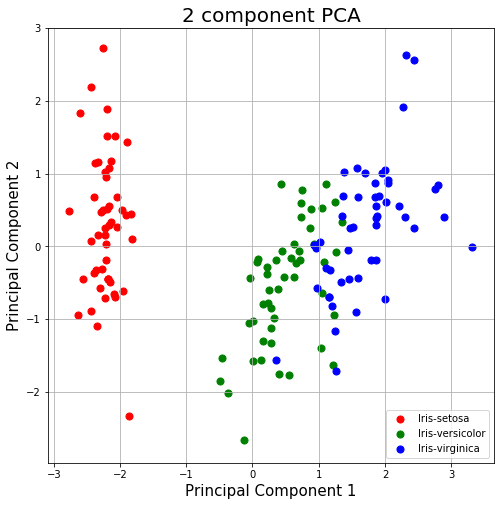

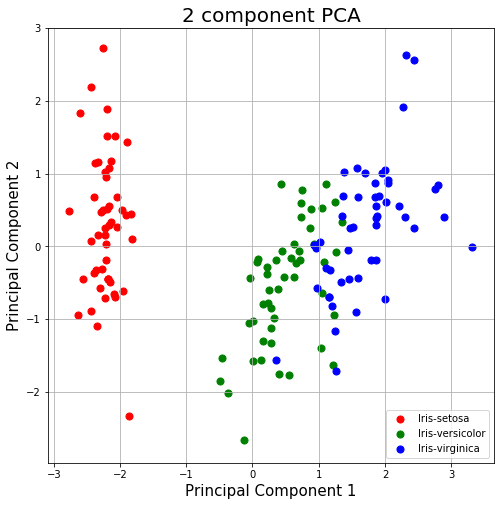

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

plt.show()

In [19]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [20]:
pca.explained_variance_

array([2.93035378, 0.92740362])

In [151]:
who_simple = pd.read_csv("../data/WHO-SIMPLE.csv")

In [152]:
who_simple.head()

,Country_Year,MDG_0000000001,PCV3,ROTAC,WHS4_100,WHS4_117,WHS4_129,WHS4_543,WHS4_544,WHS8_110,...,WSH_3,WSH_SANITATION_SAFELY_MANAGED,M_Est_smk_curr,M_Est_smk_daily,TOBACCO_0000000192,GHED_CHEGDP_SHA2011,WHS9_85,Country Code,Year,GDP
0,AFG_1962,232.04606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,1962.0,5.466667e+08
1,AFG_1963,227.83111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,1963.0,7.511112e+08
2,AFG_1964,223.85301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,1964.0,8.000000e+08
3,AFG_1965,219.92361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,1965.0,1.006667e+09
4,AFG_1966,216.06007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,1966.0,1.400000e+09


In [153]:
who_simple.columns

Index(['Country_Year', 'MDG_0000000001', 'PCV3', 'ROTAC', 'WHS4_100',
       'WHS4_117', 'WHS4_129', 'WHS4_543', 'WHS4_544', 'WHS8_110', 'MCV2',
       'NUTRITION_564', 'WHS4_128', 'LBW_NUMBER', 'LBW_PREVALENCE',
       'NUTRITION_HA_2', 'NUTRITION_WA_2', 'NUTRITION_WH2', 'NUTRITION_WH_2',
       'WHOSIS_000005', 'WHOSIS_000006', 'MDG_0000000026', 'WHS9_95',
       'WHS_PBR', 'WSH_2', 'WSH_3', 'WSH_SANITATION_SAFELY_MANAGED',
       'M_Est_smk_curr', 'M_Est_smk_daily', 'TOBACCO_0000000192',
       'GHED_CHEGDP_SHA2011', 'WHS9_85', 'Country Code', 'Year', 'GDP'],
      dtype='object')

In [154]:
usa_filter = who_simple['Country Code'] == "USA"

In [155]:
who_usa = who_simple[usa_filter]

In [156]:
# who_usa = who_usa[who_usa["Year"] >= 2000]

In [157]:
who_usa = who_usa.dropna(how="all")

In [158]:
cols_to_use = []

for col in who_usa.columns:
    if col == "Country_Year": 
        print("skipping col:", col, '\n')
    elif col == "Country Code": 
        print("skipping col:", col, '\n')
    elif col == "Year": 
        print("skipping col:", col, '\n')
    else:
        print(col)
        print(who_usa[col].value_counts())
        print()
        if len(who_usa[col].value_counts() > 10):
            cols_to_use.append(col)

skipping col: Country_Year 

MDG_0000000001
7.92969     1
12.10270    1
8.48050     1
15.93040    1
19.08584    1
8.78733     1
15.17808    1
7.35440     1
6.74598     1
6.47105     1
22.66503    1
25.88741    1
7.11413     1
5.76500     1
25.39648    1
13.17504    1
18.29825    1
10.92870    1
5.55743     1
7.02394     1
6.57525     1
6.03823     1
5.95398     1
24.89482    1
8.19128     1
23.82979    1
10.64615    1
17.50237    1
13.79409    1
10.16498    1
9.09776     1
23.26247    1
5.71130     1
10.39842    1
6.94813     1
6.35744     1
5.81959     1
11.25981    1
20.61847    1
6.13473     1
7.51110     1
19.86185    1
6.24328     1
9.92945     1
9.67397     1
22.02416    1
5.64362     1
12.61053    1
9.39507     1
6.81602     1
21.34112    1
6.66685     1
6.88054     1
14.46189    1
24.37521    1
5.88211     1
7.22363     1
16.71042    1
11.65129    1
7.70237     1
Name: MDG_0000000001, dtype: int64

PCV3
93.0    7
92.0    4
94.0    1
Name: PCV3, dtype: int64

ROTAC
73.0    4
72.

In [159]:
cols_to_use

['MDG_0000000001',
 'PCV3',
 'ROTAC',
 'WHS4_100',
 'WHS4_117',
 'WHS4_129',
 'WHS4_544',
 'WHS8_110',
 'MCV2',
 'LBW_NUMBER',
 'LBW_PREVALENCE',
 'WHOSIS_000006',
 'MDG_0000000026',
 'WHS9_95',
 'WHS_PBR',
 'WSH_2',
 'WSH_3',
 'WSH_SANITATION_SAFELY_MANAGED',
 'M_Est_smk_curr',
 'M_Est_smk_daily',
 'TOBACCO_0000000192',
 'GHED_CHEGDP_SHA2011',
 'GDP']

In [160]:
who_subset = who_usa[cols_to_use]

In [161]:
who_usa.head()

,Country_Year,MDG_0000000001,PCV3,ROTAC,WHS4_100,WHS4_117,WHS4_129,WHS4_543,WHS4_544,WHS8_110,...,WSH_3,WSH_SANITATION_SAFELY_MANAGED,M_Est_smk_curr,M_Est_smk_daily,TOBACCO_0000000192,GHED_CHEGDP_SHA2011,WHS9_85,Country Code,Year,GDP
10619,USA_1960,25.88741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,1960.0,5.433000e+11
10620,USA_1961,25.39648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,1961.0,5.633000e+11
10621,USA_1962,24.89482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,1962.0,6.051000e+11
10622,USA_1963,24.37521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,1963.0,6.386000e+11
10623,USA_1964,23.82979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,1964.0,6.858000e+11


In [162]:
for col in who_subset.columns:
    print(col)
    print(who_subset[col].value_counts(), '\n')

MDG_0000000001
7.92969     1
12.10270    1
8.48050     1
15.93040    1
19.08584    1
8.78733     1
15.17808    1
7.35440     1
6.74598     1
6.47105     1
22.66503    1
25.88741    1
7.11413     1
5.76500     1
25.39648    1
13.17504    1
18.29825    1
10.92870    1
5.55743     1
7.02394     1
6.57525     1
6.03823     1
5.95398     1
24.89482    1
8.19128     1
23.82979    1
10.64615    1
17.50237    1
13.79409    1
10.16498    1
9.09776     1
23.26247    1
5.71130     1
10.39842    1
6.94813     1
6.35744     1
5.81959     1
11.25981    1
20.61847    1
6.13473     1
7.51110     1
19.86185    1
6.24328     1
9.92945     1
9.67397     1
22.02416    1
5.64362     1
12.61053    1
9.39507     1
6.81602     1
21.34112    1
6.66685     1
6.88054     1
14.46189    1
24.37521    1
5.88211     1
7.22363     1
16.71042    1
11.65129    1
7.70237     1
Name: MDG_0000000001, dtype: int64 

PCV3
93.0    7
92.0    4
94.0    1
Name: PCV3, dtype: int64 

ROTAC
73.0    4
72.0    2
74.0    1
69.0    1


In [183]:
#ALL "relevant cols"
cols_to_use = [
    'MDG_0000000001',
    'PCV3',
    'ROTAC',
    'WHS4_100',
    'WHS4_117',
    'WHS4_129',
    'WHS4_544',
    'WHS8_110',
    'MCV2',
    'LBW_NUMBER',
    'LBW_PREVALENCE',
    'MDG_0000000026',
    'WHS_PBR',
    'WSH_SANITATION_SAFELY_MANAGED',
    'M_Est_smk_curr',
    'M_Est_smk_daily',
    'TOBACCO_0000000192',
    'GHED_CHEGDP_SHA2011',
    'GDP'
]

#Relevant cols where you don't lose too much data between them
cols_for_pca = [
    'MDG_0000000001',
    'WHS4_100',
    'WHS4_117',
    'WHS4_129',
    'WHS4_544',
    'WHS8_110',
    'GDP'
]

In [184]:
who_subset = who_usa[cols_to_use]

In [185]:
who_subset

,MDG_0000000001,PCV3,ROTAC,WHS4_100,WHS4_117,WHS4_129,WHS4_544,WHS8_110,MCV2,LBW_NUMBER,LBW_PREVALENCE,MDG_0000000026,WHS_PBR,WSH_SANITATION_SAFELY_MANAGED,M_Est_smk_curr,M_Est_smk_daily,TOBACCO_0000000192,GHED_CHEGDP_SHA2011,GDP
10619,25.88741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.433000e+11
10620,25.39648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.633000e+11
10621,24.89482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.051000e+11
10622,24.37521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.386000e+11
10623,23.82979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.858000e+11
10624,23.26247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.437000e+11
10625,22.66503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.150000e+11
10626,22.02416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.617000e+11
10627,21.34112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.425000e+11
10628,20.61847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.019900e+12


In [181]:
who_subset = who_subset.dropna(how="any")

,MDG_0000000001,WHS4_100,WHS4_117,WHS4_129,WHS4_544,WHS8_110,GDP
10654,7.92969,95.0,68.0,91.0,88.0,88.0,7.639749e+12
10655,7.70237,95.0,82.0,91.0,91.0,91.0,8.073122e+12
10656,7.51110,96.0,84.0,93.0,91.0,91.0,8.577554e+12
10657,7.35440,96.0,87.0,93.0,91.0,92.0,9.062818e+12
10658,7.22363,96.0,88.0,94.0,90.0,92.0,9.630664e+12
10659,7.11413,94.0,90.0,93.0,90.0,91.0,1.025235e+13
10660,7.02394,94.0,89.0,93.0,89.0,91.0,1.058182e+13
10661,6.94813,94.0,88.0,93.0,90.0,91.0,1.093642e+13
10662,6.88054,96.0,92.0,94.0,91.0,93.0,1.145824e+13
10663,6.81602,96.0,92.0,94.0,92.0,93.0,1.221373e+13


In [142]:
from sklearn.preprocessing import StandardScaler
features = ['PCV3',
 'ROTAC',
 'WHS4_100',
 'WHS4_117',
 'WHS4_129',
 'WHS4_544',
 'WHS8_110',
 'MCV2',
 'LBW_NUMBER',
 'LBW_PREVALENCE',
 'MDG_0000000026',
 'WHS_PBR',
 'WSH_SANITATION_SAFELY_MANAGED',
 'M_Est_smk_curr',
 'M_Est_smk_daily',
 'TOBACCO_0000000192',
 'GHED_CHEGDP_SHA2011',
 'GDP']
# Separating out the features
x = who_subset.loc[:, features].values
# Separating out the target
y = who_subset.loc[:,['MDG_0000000001']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [144]:
who_subset 

,PCV3,ROTAC,WHS4_100,WHS4_117,WHS4_129,WHS4_544,WHS8_110,MCV2,LBW_NUMBER,LBW_PREVALENCE,MDG_0000000026,WHS_PBR,WSH_SANITATION_SAFELY_MANAGED,M_Est_smk_curr,M_Est_smk_daily,TOBACCO_0000000192,GHED_CHEGDP_SHA2011,GDP
10619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.433000e+11
10620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.633000e+11
10621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.051000e+11
10622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.386000e+11
10623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.858000e+11
10624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.437000e+11
10625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.150000e+11
10626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.617000e+11
10627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.425000e+11
10628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.019900e+12


In [140]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').